## Decision Tree Classification

***Titanic data set***

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [137]:
# load data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#### Exploring data

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [140]:
# fill null values in Age
df['Age'] = df['Age'].fillna(df['Age'].median)

In [141]:
# impact of Fare
df.groupby('Survived').mean()

,Pclass,Fare
Survived,,
0,2.531876,22.117887
1,1.950292,48.395408


In [142]:
# impact of Sex for survival
sex = pd.crosstab(df.Sex, df.Survived)
sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [143]:
sex = sex.div(sex.sum(1).astype(float), axis=0)
sex

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Text(0, 0.5, 'Survival')

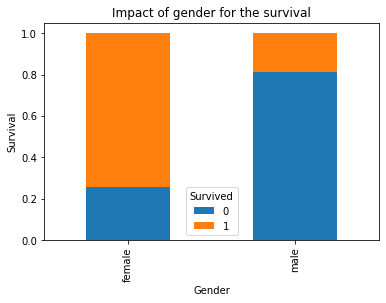

In [144]:
sex.plot(kind="bar", stacked=True)
plt.title('Impact of gender for the survival')
plt.xlabel("Gender")
plt.ylabel("Survival")

In [145]:
# impact of passenger class for the survival
pclass = pd.crosstab(df.Pclass, df.Survived)
pclass = pclass.div(pclass.sum(1).astype(float), axis=0)
pclass

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Text(0, 0.5, 'Survival')

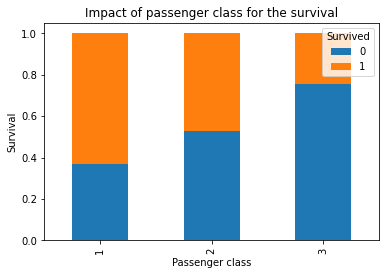

In [146]:
pclass.plot(kind="bar", stacked=True)
plt.title('Impact of passenger class for the survival')
plt.xlabel("Passenger class")
plt.ylabel("Survival")

#### dummy variables

In [147]:
# dummy variable for Sex
sex_dumm = pd.get_dummies(df['Sex'])
sex_dumm.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [148]:
# dummy variables for Pclass
#pclass_dumm = pd.get_dummies(df['Pclass'])
#pclass_dumm.head()

In [149]:
df = pd.concat([df, sex_dumm], axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


In [150]:
# final df
#df = df.drop(['Sex','Pclass', 'male', '3'], axis='columns')
#df.head()

In [151]:
x = df.drop(['Survived', 'Sex', 'female'], axis='columns')
x.head()

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [152]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [156]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(x_train)

712

In [157]:
len(x_test)

179

In [161]:
model = tree.DecisionTreeClassifier()